In [15]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
import numpy as np


In [7]:
# 1. Load dataset
dataset = fetch_ucirepo(id=697)  # Student Dropout and Academic Success
df = dataset.data.original

df.head()


,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [8]:
# 2. Encode categorical variables
le = LabelEncoder()
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))



In [9]:
# 3. Define features and target
X = df_encoded.drop(columns=['Target'])  # 'Target' is the dropout status
y = df_encoded['Target']



In [10]:
# 4. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)



In [11]:
# 5. Train model
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)



c:\Users\meswe\Desktop\UTD\Projects\Dropout_Forecasting\forenv\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:10:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [12]:
# 6. Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.81      0.74      0.77       284
           1       0.51      0.45      0.48       159
           2       0.82      0.90      0.86       442

    accuracy                           0.77       885
   macro avg       0.71      0.70      0.70       885
weighted avg       0.76      0.77      0.76       885



C:\Users\meswe\AppData\Local\Temp\ipykernel_28992\2503441657.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_df.head(15), palette='viridis')


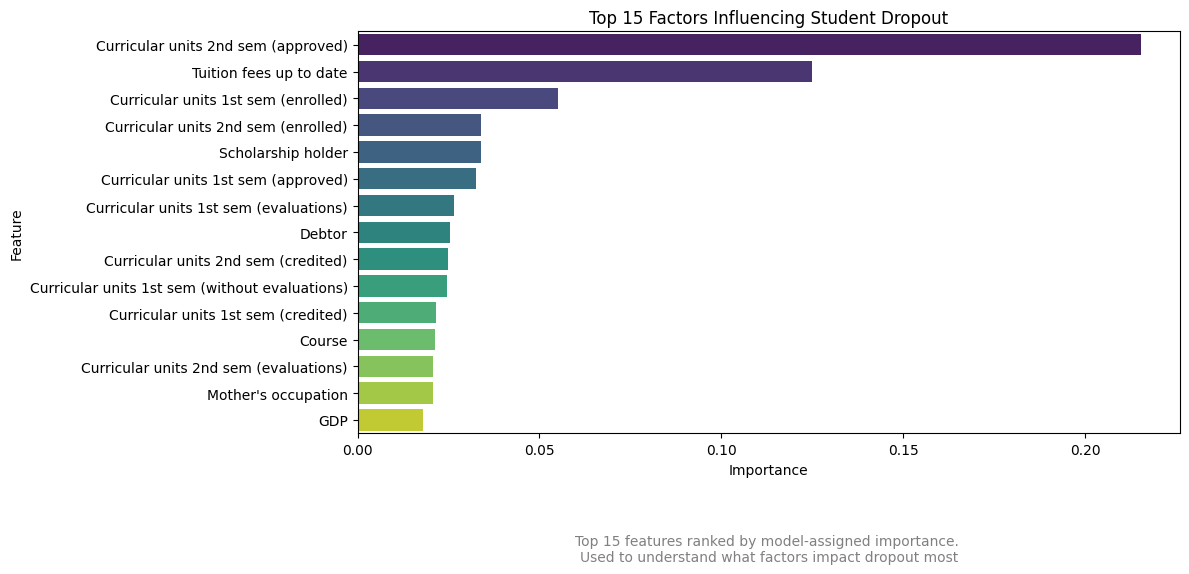

In [24]:
# 7. Plot feature importance
importances = model.feature_importances_
feature_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_df.sort_values('Importance', ascending=False, inplace=True)

plt.figure(figsize=(12,6))
sns.barplot(x='Importance', y='Feature', data=feature_df.head(15), palette='viridis')
plt.title('Top 15 Factors Influencing Student Dropout')
plt.text(0.5, -0.25,
         "Top 15 features ranked by model-assigned importance. \nUsed to understand what factors impact dropout most",
         ha='center', va='top', fontsize=10, color='gray', transform=plt.gca().transAxes)
plt.tight_layout()
plt.show()


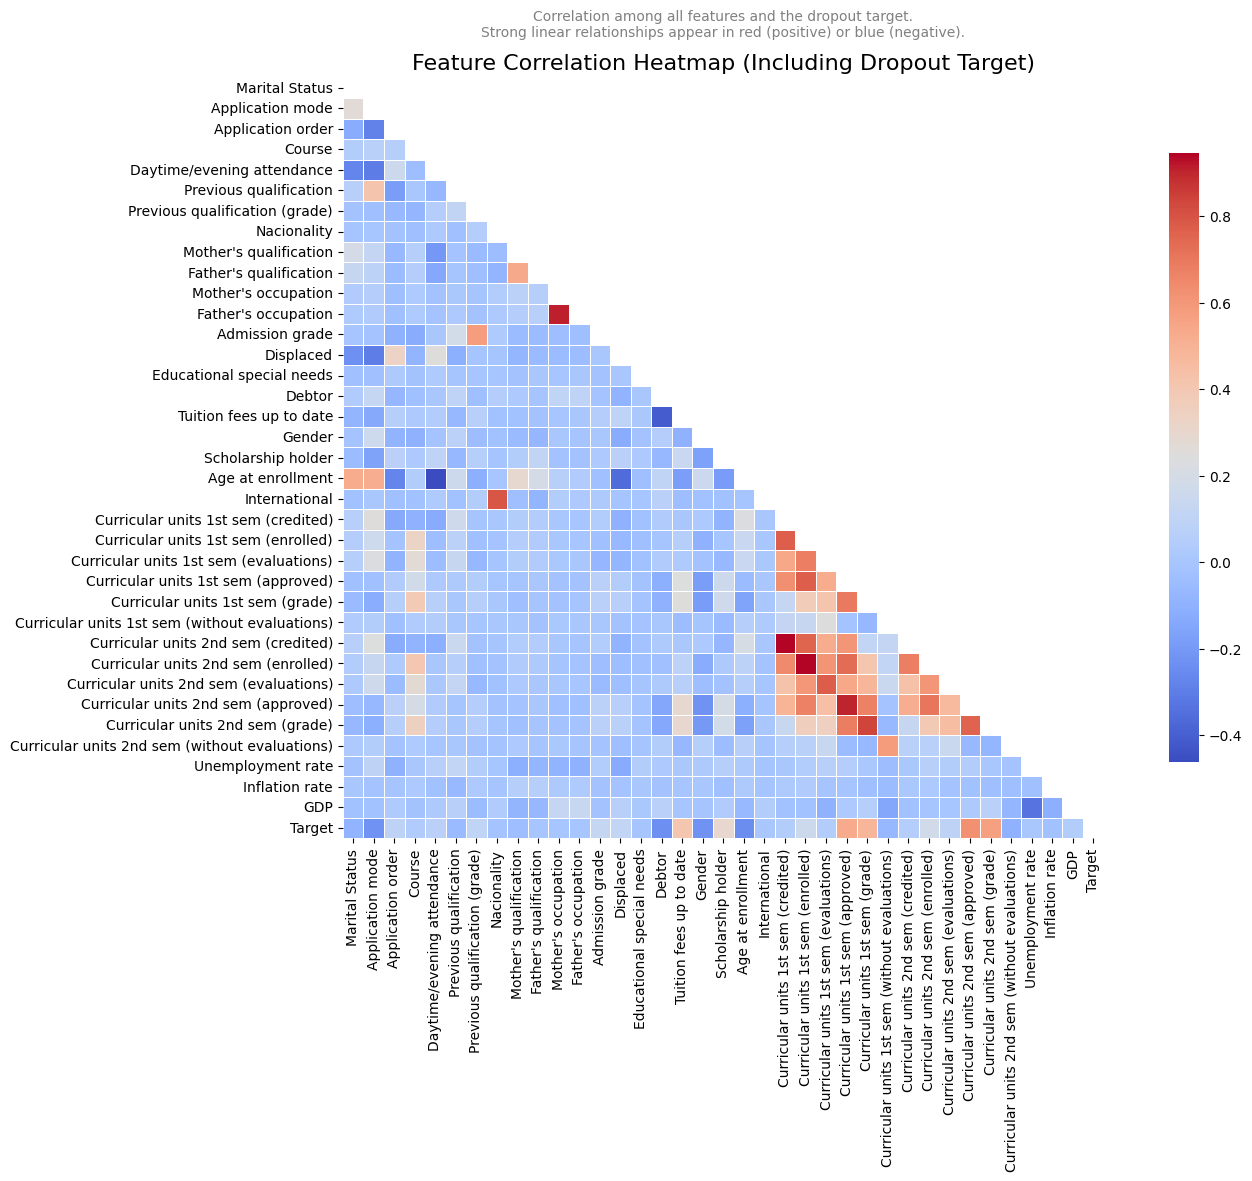

In [27]:
# Plot correlation heatmap
plt.figure(figsize=(16,12))
corr_matrix = df_encoded.corr()

sns.heatmap(
    corr_matrix,
    # annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": .8},
    mask=np.triu(corr_matrix)
)

plt.title('Feature Correlation Heatmap (Including Dropout Target)', fontsize=16)
plt.text(0.5, 1.05,
         "Correlation among all features and the dropout target.\nStrong linear relationships appear in red (positive) or blue (negative).",
         ha='center', va='bottom', fontsize=10, color='gray', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()


C:\Users\meswe\AppData\Local\Temp\ipykernel_28992\2788693766.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_encoded, x='Target', y='Admission grade', palette='Set2')


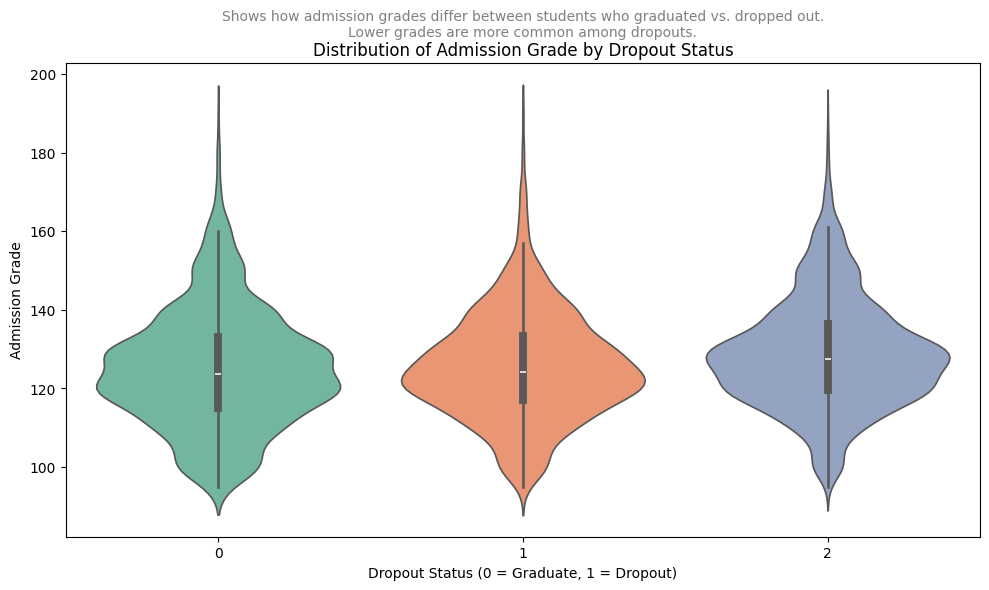

In [28]:
# Let's say your target values are 0 = graduate, 1 = dropout
# and you want to see how 'Admission grade' varies across them.

plt.figure(figsize=(10, 6))
sns.violinplot(data=df_encoded, x='Target', y='Admission grade', palette='Set2')
plt.title("Distribution of Admission Grade by Dropout Status")
plt.xlabel("Dropout Status (0 = Graduate, 1 = Dropout)")
plt.ylabel("Admission Grade")
plt.text(0.5, 1.05,
         "Shows how admission grades differ between students who graduated vs. dropped out.\nLower grades are more common among dropouts.",
         ha='center', va='bottom', fontsize=10, color='gray', transform=plt.gca().transAxes)
plt.tight_layout()
plt.show()


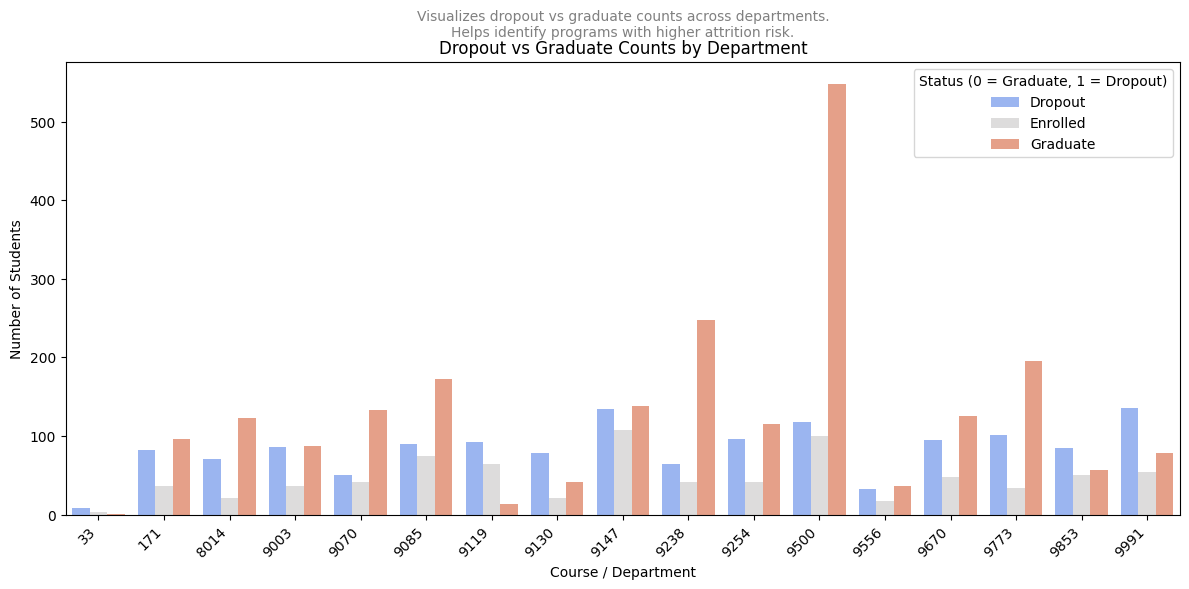

In [29]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Course', hue='Target', palette='coolwarm')
plt.title("Dropout vs Graduate Counts by Department")
plt.xlabel("Course / Department")
plt.ylabel("Number of Students")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Status (0 = Graduate, 1 = Dropout)")
plt.text(0.5, 1.05,
         "Visualizes dropout vs graduate counts across departments.\nHelps identify programs with higher attrition risk.",
         ha='center', va='bottom', fontsize=10, color='gray', transform=plt.gca().transAxes)
plt.tight_layout()
plt.show()


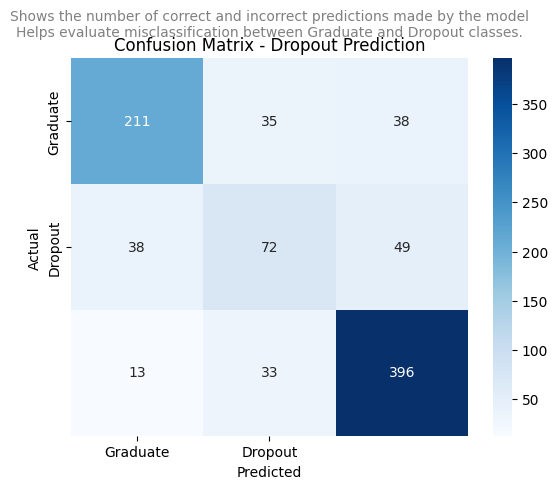

In [30]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Graduate', 'Dropout'], yticklabels=['Graduate', 'Dropout'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Dropout Prediction")
plt.text(0.5, 1.05,
         "Shows the number of correct and incorrect predictions made by the model\nHelps evaluate misclassification between Graduate and Dropout classes.",
         ha='center', va='bottom', fontsize=10, color='gray', transform=plt.gca().transAxes)
plt.tight_layout()
plt.show()


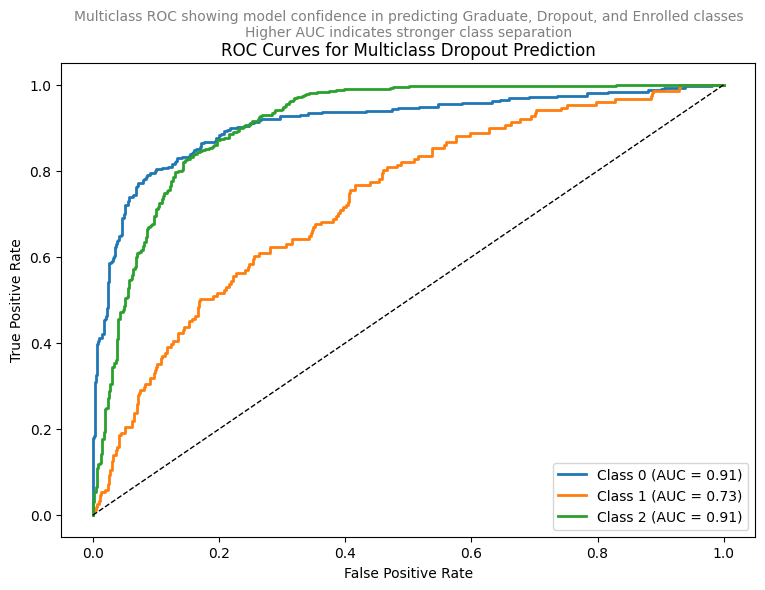

In [31]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

import numpy as np

# Binarize the output labels
y_bin = label_binarize(y, classes=[0, 1, 2])
n_classes = y_bin.shape[1]

# Re-split for this ROC example
X_train, X_test, y_train_bin, y_test_bin = train_test_split(X, y_bin, test_size=0.2, random_state=42)

# Use One-vs-Rest classifier with logistic regression
classifier = OneVsRestClassifier(make_pipeline(StandardScaler(), LogisticRegression()))
classifier.fit(X_train, y_train_bin)

# Predict probabilities
y_score = classifier.predict_proba(X_test)

# Plot ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(8,6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Multiclass Dropout Prediction")
plt.legend(loc="lower right")
plt.text(0.5, 1.05,
         "Multiclass ROC showing model confidence in predicting Graduate, Dropout, and Enrolled classes\nHigher AUC indicates stronger class separation",
         ha='center', va='bottom', fontsize=10, color='gray', transform=plt.gca().transAxes)
plt.tight_layout()
plt.show()
